<h1>Data Set 4</h1>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TrainData4.txt', sep='\s+', header = None)
labels = pd.read_csv('TrainLabel4.txt', header=None, names=['target'])
df['target'] = labels['target']

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,target
0,-0.449870,-0.200490,-0.487290,-0.061085,-0.051024,-0.021653,0.307880,-0.057097,-0.015610,0.132410,...,23.2100,146.23,-178.08,152.01,-129.720,126.480,-147.33,168.65,180.33,1
1,-0.528430,-0.259120,-0.425840,-0.061339,-0.075853,-0.027442,0.301660,-0.064007,-0.042905,0.330570,...,-4.6825,103.02,-182.73,168.97,-151.290,124.890,-118.42,125.41,203.31,1
2,-0.498230,-0.263460,-0.406830,-0.050683,-0.066742,-0.024397,0.275000,-0.130610,-0.105670,0.285960,...,-53.3400,161.33,-180.05,151.52,-127.850,117.960,-125.76,139.76,193.23,1
3,-0.424050,-0.183920,-0.337610,-0.035511,-0.048362,-0.008383,0.234870,-0.197570,-0.075233,0.133230,...,-93.0770,145.09,172.44,-196.78,-135.790,124.880,-134.61,145.45,194.52,1
4,-0.214870,-0.245080,-0.252040,-0.111790,-0.045751,-0.035225,0.216660,-0.216510,-0.085224,0.331200,...,-149.6900,154.25,-168.03,172.94,161.300,-164.670,179.68,-194.52,192.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,-0.055413,-0.028708,-0.050070,-0.092470,-0.087130,-0.037582,0.044267,-0.384240,-0.281220,0.051134,...,-183.1200,172.83,199.73,-226.64,158.590,-97.553,127.84,-185.16,203.81,8
2543,-0.044765,-0.028708,-0.020877,-0.034470,-0.014174,-0.037582,0.043463,-0.386750,-0.293210,0.026051,...,-171.6100,170.07,150.35,-188.96,214.620,-172.170,168.19,-190.24,197.18,8
2544,-0.053542,-0.089060,-0.090247,-0.172140,-0.162600,-0.081363,0.049554,-0.413170,-0.293190,0.121840,...,-170.9900,181.53,154.11,-175.15,179.540,-172.070,204.38,-203.96,189.57,8
2545,-0.104460,-0.231630,-0.228320,-0.260140,-0.243730,-0.184850,0.055340,-0.424890,-0.290430,0.226890,...,-212.7500,182.87,176.90,-216.82,-85.159,131.410,135.09,-138.10,179.36,8


In [4]:
df['target'].value_counts()

target
8    298
4    292
7    289
1    288
6    287
5    278
2    275
3    270
9    270
Name: count, dtype: int64

In [5]:
missing_mask = df == 1e99
print(max(df[missing_mask].count()))

0


In [6]:
def data_quality_report(df):
    report_data = []
    for i, column in enumerate(df.columns, 1):
        data = df[column]
        
        # Replace 1e99 with NaN for calculations
        data_clean = data.replace(1e99, np.nan)
        
        # Calculate statistics
        count = len(data)
        missing = (data == 1e99).sum()
        missing_percentage = (missing / count) * 100
        cardinality = data_clean.nunique()
        min_val = data_clean.min()
        q1 = data_clean.quantile(0.25)
        median = data_clean.median()
        q3 = data_clean.quantile(0.75)
        max_val = data_clean.max()
        mean = data_clean.mean()
        std_dev = data_clean.std()
        
        report_data.append({
            'Feature No.': i,
            'Count': count,
            '% of Missing': round(missing_percentage, 2),
            'Cardinality': cardinality,
            'Min.': min_val,
            'Q1': q1,
            'Median': median,
            'Q3': q3,
            'Max.': max_val,
            'Mean': mean,
            'Std. Dev.': std_dev
        })
    
    # Create a DataFrame from the collected data
    report_df = pd.DataFrame(report_data)
    
    return report_df

# Assuming your original DataFrame is named 'df'
quality_report_df = data_quality_report(df)

quality_report_df

,Feature No.,Count,% of Missing,Cardinality,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
0,1,2547,0.0,2473,-0.52843,-0.109270,-0.071387,-0.047012,-0.004224,-0.093546,0.072641
1,2,2547,0.0,2468,-0.44809,-0.140560,-0.065793,-0.034489,0.006304,-0.091677,0.071835
2,3,2547,0.0,2482,-0.55515,-0.126820,-0.085690,-0.055976,-0.004176,-0.101017,0.066948
3,4,2547,0.0,2127,-0.26914,-0.069749,-0.047074,-0.027919,-0.004772,-0.054623,0.036646
4,5,2547,0.0,1944,-0.41732,-0.036963,-0.023297,-0.015331,-0.001507,-0.031694,0.029386
...,...,...,...,...,...,...,...,...,...,...,...
108,109,2547,0.0,2372,-315.20000,-157.265000,126.480000,175.045000,289.390000,31.467883,158.204106
109,110,2547,0.0,2377,-301.54000,-178.720000,-122.600000,164.830000,299.000000,-25.368814,162.878956
110,111,2547,0.0,2311,-331.64000,-179.000000,79.765000,176.855000,323.950000,5.619679,172.969984
111,112,2547,0.0,2207,-287.41000,-176.760000,-92.960000,179.055000,282.050000,-6.596105,176.919819


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns     

In [8]:
X = df.drop(['target'], axis=1)
y = df['target']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Get the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components that explain, say, 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

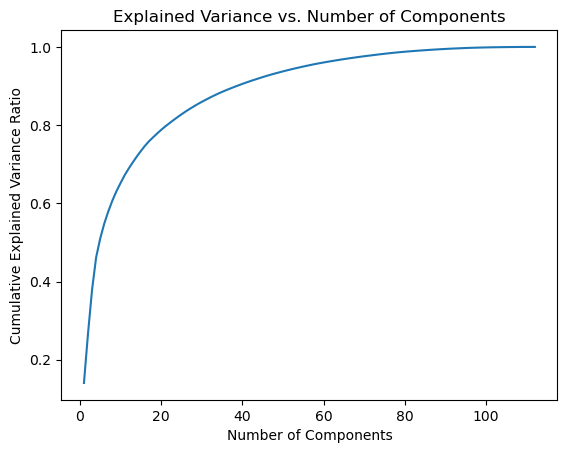

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [12]:
pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(X_pca_final.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56
0,7.491247,3.963658,4.499031,-0.573664,6.737079,1.851596,-1.272414,6.377460,6.602978,1.431240,...,1.447108,-0.719115,-0.418009,-0.331542,-0.041267,-0.060721,-0.151321,0.701685,0.488501,-1.414404
1,8.513930,4.530220,5.799421,-0.683508,7.478755,-0.210018,0.054632,5.777206,8.683063,1.543460,...,0.512079,-0.700475,0.052561,-0.341593,0.518648,-0.554591,-1.032668,-0.362770,-0.121614,-0.623496
2,8.818910,4.613526,6.158394,-0.447384,7.577527,1.450634,-0.787461,6.814978,8.735784,1.767699,...,0.307384,0.121496,-0.178142,-0.790539,-0.092515,-1.362096,0.360630,-0.364533,-0.911782,-0.089149
3,5.284365,4.429436,6.311935,-0.023068,5.396666,0.476742,-2.156161,3.133585,6.618047,1.133530,...,0.075249,-1.247522,-0.952129,-0.363323,1.369736,2.183446,-0.245776,-0.957905,0.823324,-0.503958
4,4.508432,2.652704,5.625622,0.029994,6.893125,1.140655,0.068546,4.699064,1.844396,2.589161,...,-0.879140,-0.668177,-0.186611,0.286921,0.871689,-0.650803,-0.803867,-0.633245,-0.246195,0.233871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,-5.617808,5.118667,6.369065,-2.465508,-1.558949,2.365107,-0.939102,-1.590085,0.458899,0.673855,...,0.277194,-0.081628,0.634371,0.237780,-0.002235,-0.305603,1.266673,-0.354914,-0.937346,-0.902553
2543,-6.446734,4.217362,6.240081,0.226856,-2.345379,4.277971,-1.228566,-0.835669,0.638809,-3.261116,...,-0.254677,-0.316485,0.204969,0.622500,0.766433,0.658012,-0.920830,-1.008872,-0.702505,-0.040316
2544,-6.773929,4.263735,7.715810,-2.438318,2.230097,1.807373,0.451130,-0.722337,-1.106080,1.751626,...,0.359728,-0.288465,0.902047,0.074430,-0.310360,0.141959,0.098551,-0.084810,0.182198,0.050843
2545,-5.513211,4.258114,8.992927,-7.294796,3.656457,1.911071,5.212987,-0.748550,-1.909370,1.119391,...,0.423711,0.237886,0.449031,-0.638694,-0.800823,0.266752,-0.752255,0.446937,0.492355,-0.082887


In [13]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, train_size=0.8, random_state=42)

X_train.shape, X_test.shape

((2037, 56), (510, 56))

In [14]:
# Check the class distribution in the training set
print("Original training set class distribution:")
print(np.unique(y_train, return_counts=True))

Original training set class distribution:
(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([239, 214, 215, 227, 226, 235, 225, 241, 215]))


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear','sigmoid']
}

# Create an SVM classifier
svm = SVC(random_state=42)

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [16]:
# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 score (macro average)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Calculate precision (macro average)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (macro): {precision:.4f}")

# Calculate recall (macro average)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (macro): {recall:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9078
F1 Score (macro): 0.9074
Precision (macro): 0.9088
Recall (macro): 0.9086

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.92      0.88        49
           2       0.88      0.87      0.88        61
           3       0.88      0.82      0.85        55
           4       0.95      0.89      0.92        65
           5       0.86      0.98      0.92        52
           6       1.00      0.88      0.94        52
           7       0.92      0.94      0.93        64
           8       0.89      0.89      0.89        57
           9       0.93      0.98      0.96        55

    accuracy                           0.91       510
   macro avg       0.91      0.91      0.91       510
weighted avg       0.91      0.91      0.91       510



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  1,  1,  2,  0,  0,  0,  0,  0],
       [ 3, 53,  4,  0,  0,  0,  0,  0,  1],
       [ 3,  5, 45,  0,  0,  0,  1,  1,  0],
       [ 2,  1,  0, 58,  3,  0,  0,  1,  0],
       [ 0,  0,  0,  1, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5, 46,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 60,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  3, 51,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 54]])

<h2>XGBoost</h2>

In [18]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, train_size=0.8, random_state=42)
# Encode labels if they're not already numeric
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [21]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300}


In [23]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.8235

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        49
           1       0.80      0.77      0.78        61
           2       0.87      0.75      0.80        55
           3       0.89      0.83      0.86        65
           4       0.75      0.88      0.81        52
           5       0.80      0.85      0.82        52
           6       0.93      0.83      0.88        64
           7       0.85      0.89      0.87        57
           8       0.81      0.78      0.80        55

    accuracy                           0.82       510
   macro avg       0.82      0.82      0.82       510
weighted avg       0.83      0.82      0.82       510



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  3,  2,  3,  0,  0,  0,  0,  0],
       [ 3, 47,  4,  0,  3,  1,  1,  0,  2],
       [ 3,  7, 41,  2,  0,  0,  1,  0,  1],
       [ 6,  0,  0, 54,  5,  0,  0,  0,  0],
       [ 2,  0,  0,  1, 46,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  7, 44,  1,  0,  0],
       [ 2,  2,  0,  0,  0,  2, 53,  4,  1],
       [ 0,  0,  0,  1,  0,  0,  0, 51,  5],
       [ 0,  0,  0,  0,  0,  7,  0,  5, 43]])